In [1]:
!nvidia-smi

Wed May  1 11:27:22 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  |   00000000:01:00.0  On |                  Off |
|  0%   43C    P3             95W /  450W |    2100MiB /  24564MiB |     10%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
%env LC_ALL=C.UTF-8
%env LANG=C.UTF-8
%env TRANSFORMERS_CACHE=/content/cache
%env HF_DATASETS_CACHE=/content/cache
%env CUDA_LAUNCH_BLOCKING=1

env: LC_ALL=C.UTF-8
env: LANG=C.UTF-8
env: TRANSFORMERS_CACHE=/content/cache
env: HF_DATASETS_CACHE=/content/cache
env: CUDA_LAUNCH_BLOCKING=1


In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from tqdm import tqdm

import torchaudio
from sklearn.model_selection import train_test_split

import os
import sys
import torch

os.chdir(r'C:\Users\777\Documents\dusha')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
df = pd.read_csv('major_train_balanced.csv')
#df = df[['audio_path', 'annotator_emo']]
df = df.sample(12000)
df['audio_path'] = df['audio_path'].apply(lambda x: os.path.join(r"DATASET_PATH\wavs_train", x))
df

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
28279,7a3c26129d41008b36dcbc3394ce7f2e,DATASET_PATH\wavs_train\7a3c26129d41008b36dcbc...,4.200125,0.0,NaN,d6b5eac94428cfad71114fbccbcf4dbc,NaN,NaN,3dd2fd4559f4eb295ddcdd27f2cef42b,podcast
8079,4be103af1edade3888dadf1b26844a17,DATASET_PATH\wavs_train\4be103af1edade3888dadf...,2.878875,0.0,NaN,7c3cf0423a3c70cb31328553958d321c,координат жена,neutral,805e393cb135cb83530ff36a5dad0159,crowd
110896,aa4ba9291f7c2f28184230672878bda0,DATASET_PATH\wavs_train\aa4ba9291f7c2f28184230...,3.599875,2.0,NaN,3641bfaf02e4cb2cce6bfecc2959ceb4,NaN,NaN,31f9d3fcbb9f5092099573d00f388708,podcast
38270,3bac26684491c3a8842a81364316258c,DATASET_PATH\wavs_train\3bac26684491c3a8842a81...,2.901000,3.0,NaN,68b99fac233ab17186b01ba26cb1b884,ты что гонишь,angry,7dce79b9fcbb8f4d54b7582db14cc4e3,crowd
25363,12afd4ba004b45e6f9e1815c88ebc28d,DATASET_PATH\wavs_train\12afd4ba004b45e6f9e181...,3.040000,0.0,NaN,ed5a29082cb09e32c6495eb57d68275c,отставить,angry,cf01891816d963afe2880eee6d30baa9,crowd
...,...,...,...,...,...,...,...,...,...,...
63863,59c57120294c6afece4bcb7bf14c1814,DATASET_PATH\wavs_train\59c57120294c6afece4bcb...,5.780000,3.0,NaN,cf55cf68ff1f187056151fc58bed93b3,салют это ты вообще ничего не умеешь делать,angry,5481efc0819d5735d6043fbb2318adf8,crowd
55254,fa5ac4dbe7050f0380b5c8d1d834c10b,DATASET_PATH\wavs_train\fa5ac4dbe7050f0380b5c8...,3.800000,3.0,NaN,adc68b590f5cc535a83ac44c453e3270,люблю и ненавижу карла монте,angry,353a2f085ea4a8a7028f4c1cf575ec2e,crowd
2286,49ef55c6a00c8b0efc2172da249773bb,DATASET_PATH\wavs_train\49ef55c6a00c8b0efc2172...,3.940000,0.0,NaN,90bfcc3d072ab5982d0d97734a2afb40,запусти аудио поздравления,neutral,414e1509d24b24660e51ecd152bc7cd2,crowd
35803,517e6fee88892367e0c4d2423f6e8c45,DATASET_PATH\wavs_train\517e6fee88892367e0c4d2...,4.920000,3.0,3.0,2fddd91b77f7cb6caba899d9fc7bcd7b,NaN,NaN,NaN,crowd


In [3]:
ideal = pd.read_csv('ideal_data_csv.csv')
ideal['audio_path'] = ideal['audio_path'].apply(lambda x: os.path.join(r"DATASET_PATH\wavs_test", x))


In [4]:
ideal

,Unnamed: 0,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
0,0,9e9961c53ca6eeb440b217e539fbf46c,DATASET_PATH\wavs_test\9e9961c53ca6eeb440b217e...,5.82,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f,crowd
1,1,0166f65a30354db8282682b1a280e64c,DATASET_PATH\wavs_test\0166f65a30354db8282682b...,3.70,1.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f,crowd
2,2,d49a6b560155831725a7bdc7d0a96099,DATASET_PATH\wavs_test\d49a6b560155831725a7bdc...,4.38,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8,crowd
3,3,c6852b0925797612d7b6724da8cbe7b4,DATASET_PATH\wavs_test\c6852b0925797612d7b6724...,8.58,0.0,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral,0855e363c1787df1592f58f7a27ebe13,crowd
4,4,64a7aa17132c3e4b7be1aaed5fc88090,DATASET_PATH\wavs_test\64a7aa17132c3e4b7be1aae...,5.06,2.0,NaN,32bd471407fe168dacd5f8252f9949b7,а там и ева проснулись с утра,positive,82f97728c4767b283d249afc96d23caf,crowd
...,...,...,...,...,...,...,...,...,...,...,...
29029,12046,0b5911175dd80e2d5b0f6ebe2281fcf1,DATASET_PATH\wavs_test\0b5911175dd80e2d5b0f6eb...,2.60,0.0,NaN,d7fe5fc7ecf7df35fc43859c99491cd6,NaN,NaN,0f9ed62245fdc1e36a3bf8c0f7270c41,podcast
29030,12047,1227da4809819378be4f2aac7353c592,DATASET_PATH\wavs_test\1227da4809819378be4f2aa...,1.30,0.0,NaN,013f1749c55055e16f8acf9817598b2d,NaN,NaN,742833af70986b8ff933b1cb75cb0987,podcast
29031,12048,b7ac0b2d52191acfa44cbcc09d071de4,DATASET_PATH\wavs_test\b7ac0b2d52191acfa44cbcc...,3.10,0.0,NaN,9fccb985c2f1910e12a1b7386180aa59,NaN,NaN,6a2370e4e8cc496c4d59408bb2a9995a,podcast
29032,12049,7e62e88117cc0cc20bba2c7902cee97d,DATASET_PATH\wavs_test\7e62e88117cc0cc20bba2c7...,2.10,0.0,NaN,d6b5eac94428cfad71114fbccbcf4dbc,NaN,NaN,d0c7db9d0bc8dd57be358f6bf13d3f90,podcast


In [5]:
# Filter broken and non-existed paths

print(f"Step 0: {len(df)}")

df["status"] = df["audio_path"].apply(lambda path: True if os.path.exists(path) else None)
df = df.dropna(subset=["audio_path"])
df = df.drop("status", axis=1)
print(f"Step 1: {len(df)}")

df = df.sample(frac=1)
df = df.reset_index(drop=True)

Step 0: 12000
Step 1: 12000


In [6]:
print("Labels: ", df["annotator_emo"].unique())
print()
df.groupby("annotator_emo").count()[["audio_path"]]

Labels:  [3. 0. 1. 2.]



,audio_path
annotator_emo,
0.0,3695
1.0,3311
2.0,2587
3.0,2407


In [7]:
df

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
0,621315077c717e2a3296c0dadc2b4b04,DATASET_PATH\wavs_train\621315077c717e2a3296c0...,2.559625,3.0,NaN,a73889d2db207dbfea45531bff387475,членоголовый,angry,6775333f95be6402c6d86614e0dfeb16,crowd
1,5690742fd622e6023994d43b1981cb96,DATASET_PATH\wavs_train\5690742fd622e6023994d4...,3.399875,0.0,NaN,644d5a687b230e78c8463bbe6965fd9f,NaN,NaN,cb098f47db08719c927cd5cf3743812e,podcast
2,13cbf4d247c8f2dc9049bfb1941320ca,DATASET_PATH\wavs_train\13cbf4d247c8f2dc9049bf...,4.300125,1.0,NaN,6b6874499b481fd50ddec1ddef9be70e,NaN,NaN,f35e8a803afd25d9f4c7d5ab72a14916,podcast
3,61285c88ba2c3b50f92118308dccdf8e,DATASET_PATH\wavs_train\61285c88ba2c3b50f92118...,4.800000,2.0,NaN,edc05799349f8bfa7ee9fba4d1bbb622,покажи салют девятого мая в москве на красной ...,neutral,18646519c68578f7f521df6134e53553,crowd
4,dd155a03c303972b89b8e402b0417f58,DATASET_PATH\wavs_train\dd155a03c303972b89b8e4...,6.140000,0.0,NaN,6a940ad03e186c9027dd98bd2b643942,желейный мишка,neutral,22f9d4e934cdda7d201cca61c4045362,crowd
...,...,...,...,...,...,...,...,...,...,...
11995,0222bdd3460f72b291dcc2abb6a04e40,DATASET_PATH\wavs_train\0222bdd3460f72b291dcc2...,4.968687,0.0,NaN,1197aa20b2695bd95ba2d1a51a3e9af5,скажи как мне загрузить фотографию с google диска,neutral,12203e38b10471d739edb03396fa8d5f,crowd
11996,818729f0a1928881151c37cbedcc7da0,DATASET_PATH\wavs_train\818729f0a1928881151c37...,6.420000,1.0,NaN,cdc567ed9fe70591a4e6ef4ed367205f,вторая серия фиксиков,sad,b1d0b5822fb7b25137c9a0086facbe12,crowd
11997,7ec6a72e1a158e71238a16a282271c6c,DATASET_PATH\wavs_train\7ec6a72e1a158e71238a16...,4.440000,1.0,NaN,ad8e4aad255f19a96a34dcbc98f11f0a,смотреть джокер ютуб,sad,7e2542f056d4fcacb642e968d6b6f018,crowd
11998,6e058e26532d14f0da999ef86ab6d588,DATASET_PATH\wavs_train\6e058e26532d14f0da999e...,3.420000,0.0,NaN,076ffc89109d8d0cb8727de8f75b5c94,включите группу чайф,sad,414e1509d24b24660e51ecd152bc7cd2,crowd


In [8]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=123, stratify=df["annotator_emo"])

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df.to_csv(f"train_w2v.csv", sep="\t", encoding="utf-8", index=False)
test_df.to_csv(f"test_w2v.csv", sep="\t", encoding="utf-8", index=False)


print(train_df.shape)
print(test_df.shape)

(9000, 10)
(3000, 10)


In [40]:
train_df, test_df = train_test_split(ideal, test_size=0.99, random_state=123, stratify=ideal["annotator_emo"])

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df.to_csv(f"train_w2v.csv", sep="\t", encoding="utf-8", index=False)
test_df.to_csv(f"test_w2v.csv", sep="\t", encoding="utf-8", index=False)


print(train_df.shape)
print(test_df.shape)

(290, 11)
(28744, 11)


In [41]:
from datasets import load_dataset, load_metric


data_files = {
    "train": "train_w2v.csv",
    "validation": "test_w2v.csv",
}

dataset = load_dataset("csv", data_files=data_files, delimiter="\t", )
train_dataset = dataset["train"]
eval_dataset = dataset["validation"]

print(train_dataset)
print(eval_dataset)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['Unnamed: 0', 'hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset'],
    num_rows: 290
})
Dataset({
    features: ['Unnamed: 0', 'hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset'],
    num_rows: 28744
})


In [42]:
# We need to specify the input and output column
input_column = "audio_path"
output_column = "annotator_emo"

In [43]:
# we need to distinguish the unique labels in our SER dataset
label_list = train_dataset.unique(output_column)
label_list.sort()  # Let's sort it for determinism
num_labels = len(label_list)
print(f"A classification problem with {num_labels} classes: {label_list}")

A classification problem with 4 classes: [0.0, 1.0, 2.0, 3.0]


In [12]:
from transformers import AutoConfig, Wav2Vec2Processor, Wav2Vec2FeatureExtractor

In [13]:
model_name_or_path = "facebook/hubert-base-ls960"
pooling_mode = "mean"

In [14]:
# config
config = AutoConfig.from_pretrained(
    model_name_or_path,
    num_labels=num_labels,
    label2id={label: i for i, label in enumerate(label_list)},
    id2label={i: label for i, label in enumerate(label_list)},
    finetuning_task="wav2vec2_clf",
)
setattr(config, 'pooling_mode', pooling_mode)

In [15]:
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name_or_path,)
target_sampling_rate = feature_extractor.sampling_rate
print(f"The target sampling rate: {target_sampling_rate}")

The target sampling rate: 16000


In [16]:
def speech_file_to_array_fn(path):
    speech_array, sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(sampling_rate, target_sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech

def label_to_id(label, label_list):

    if len(label_list) > 0:
        return label_list.index(label) if label in label_list else -1

    return label

def preprocess_function(examples):
    speech_list = [speech_file_to_array_fn(path) for path in examples[input_column]]
    target_list = [label_to_id(label, label_list) for label in examples[output_column]]

    result = feature_extractor(speech_list, sampling_rate=target_sampling_rate)
    result["labels"] = list(target_list)

    return result

In [44]:
train_dataset = train_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=1
)
eval_dataset = eval_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=1
)

Map:   0%|          | 0/290 [00:00<?, ? examples/s]

Map:   0%|          | 0/28744 [00:00<?, ? examples/s]

In [24]:
#tr_dataset = train_dataset

In [40]:
tr_dataset

Dataset({
    features: ['hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset', 'input_values', 'labels'],
    num_rows: 9000
})

In [24]:
idx = 0
print(f"Training input_values: {train_dataset[idx]['input_values']}")
# print(f"Training attention_mask: {train_dataset[idx]['attention_mask']}")
print(f"Training labels: {train_dataset[idx]['labels']} - {train_dataset[idx]['annotator_emo']}")

Training input_values: [-0.0217021144926548, -0.04153379797935486, -0.013536127284169197, -0.0042035700753331184, -0.0205355454236269, -0.06836490333080292, -0.05436606705188751, -0.0205355454236269, -0.02286868542432785, -0.05086635798215866, -0.06953147053718567, -0.04270036891102791, -0.0077032786794006824, -0.011202988214790821, -0.011202988214790821, -0.028701532632112503, -0.07186461240053177, -0.03803408890962601, -0.019368976354599, -0.019368976354599, -0.0007038607145659626, 0.002795848296955228, -0.013536127284169197, 0.03079352155327797, 0.045958928763866425, 0.016794685274362564, 0.022627532482147217, 0.006295557599514723, 0.026127241551876068, 0.045958928763866425, 0.03545980155467987, 0.03312665969133377, 0.023794103413820267, 0.008628697134554386, 0.023794103413820267, -0.0065367091447114944, -0.010036418214440346, 0.019127823412418365, 0.017961254343390465, 0.009795266203582287, 0.014461545273661613, 0.05062520503997803, 0.03079352155327797, 0.021460963413119316, 0.0249

In [18]:
from dataclasses import dataclass
from typing import Optional, Tuple
import torch
from transformers.file_utils import ModelOutput


@dataclass
class SpeechClassifierOutput(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None

In [19]:
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss

# from transformers.models.wav2vec2.modeling_wav2vec2 import (
#     Wav2Vec2PreTrainedModel,
#     Wav2Vec2Model
# )
from transformers.models.hubert.modeling_hubert import (
    HubertPreTrainedModel,
    HubertModel
)


class HubertClassificationHead(nn.Module):
    """Head for hubert classification task."""

    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x


class HubertForSpeechClassification(HubertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.pooling_mode = config.pooling_mode
        self.config = config

        self.hubert = HubertModel(config)
        self.classifier = HubertClassificationHead(config)

        self.init_weights()

    def freeze_feature_extractor(self):
        self.hubert.feature_extractor._freeze_parameters()

    def merged_strategy(
            self,
            hidden_states,
            mode="mean"
    ):
        if mode == "mean":
            outputs = torch.mean(hidden_states, dim=1)
        elif mode == "sum":
            outputs = torch.sum(hidden_states, dim=1)
        elif mode == "max":
            outputs = torch.max(hidden_states, dim=1)[0]
        else:
            raise Exception(
                "The pooling method hasn't been defined! Your pooling mode must be one of these ['mean', 'sum', 'max']")

        return outputs

    def forward(
            self,
            input_values,
            attention_mask=None,
            output_attentions=None,
            output_hidden_states=None,
            return_dict=None,
            labels=None,
    ):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        outputs = self.hubert(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_states = outputs[0]
        hidden_states = self.merged_strategy(hidden_states, mode=self.pooling_mode)
        logits = self.classifier(hidden_states)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SpeechClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )


In [20]:
from dataclasses import dataclass
from typing import Dict, List, Optional, Union
import torch

import transformers
from transformers import Wav2Vec2FeatureExtractor


@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        feature_extractor (:class:`~transformers.Wav2Vec2FeatureExtractor`)
            The feature_extractor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    feature_extractor: Wav2Vec2FeatureExtractor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [feature["labels"] for feature in features]

        d_type = torch.long if isinstance(label_features[0], int) else torch.float

        batch = self.feature_extractor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        batch["labels"] = torch.tensor(label_features, dtype=d_type)

        return batch

In [21]:
data_collator = DataCollatorCTCWithPadding(feature_extractor=feature_extractor, padding=True)

In [22]:
is_regression = False

In [23]:
import numpy as np
from transformers import EvalPrediction


def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = np.squeeze(preds) if is_regression else np.argmax(preds, axis=1)

    if is_regression:
        return {"mse": ((preds - p.label_ids) ** 2).mean().item()}
    else:
        return {"accuracy": (preds == p.label_ids).astype(np.float32).mean().item()}

In [24]:
drive_dir = "/content"
!ls {drive_dir}
output_dir = os.path.join(drive_dir, "ckpts", "hubert-base-my-fb")
!ls {output_dir}

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [27]:
import os
import shutil

last_checkpoint = None
checkpoints = []
if os.path.exists(output_dir):
    for subdir in os.scandir(output_dir):
        if subdir.is_dir():
            checkpoints.append(subdir.path)


if len(checkpoints) > 0:
    checkpoints = list(sorted(checkpoints, key=lambda ckpt: ckpt.split('/')[-1].split('-')[-1], reverse=True))
    model_name_or_path = os.path.join("hubert_cheks1", checkpoints[0].split("/")[-1])
    last_checkpoint = model_name_or_path
    shutil.copytree(checkpoints[0], model_name_or_path)

In [28]:
print(f"model_name_or_path: {model_name_or_path}")
print(f"last_checkpoint: {last_checkpoint}")

model_name_or_path: hubert_cheks1\content\ckpts\hubert-base-my-fb\runs
last_checkpoint: hubert_cheks1\content\ckpts\hubert-base-my-fb\runs


In [29]:
model = HubertForSpeechClassification.from_pretrained(
    "facebook/hubert-base-ls960",
    config=config,
)

Some weights of HubertForSpeechClassification were not initialized from the model checkpoint at facebook/hubert-base-ls960 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
model.freeze_feature_extractor()

In [31]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    evaluation_strategy="steps",
    num_train_epochs=1.0,
    fp16=True,
    save_steps=10,
    eval_steps=10,
    logging_steps=10,
    learning_rate=1e-4,
    save_total_limit=2,
    do_train=True,
    do_eval=True,
    do_predict=True
)

In [32]:
from typing import Any, Dict, Union

import torch
from packaging import version
from torch import nn

from transformers import (
    Trainer,
    is_apex_available,
)

if is_apex_available():
    from apex import amp

if version.parse(torch.__version__) >= version.parse("1.6"):
    _is_native_amp_available = True
    from torch.cuda.amp import autocast


class CTCTrainer(Trainer):
    def training_step(self, model: nn.Module, inputs: Dict[str, Union[torch.Tensor, Any]]) -> torch.Tensor:
        """
        Perform a training step on a batch of inputs.

        Subclass and override to inject custom behavior.

        Args:
            model (:obj:`nn.Module`):
                The model to train.
            inputs (:obj:`Dict[str, Union[torch.Tensor, Any]]`):
                The inputs and targets of the model.

                The dictionary will be unpacked before being fed to the model. Most models expect the targets under the
                argument :obj:`labels`. Check your model's documentation for all accepted arguments.

        Return:
            :obj:`torch.Tensor`: The tensor with training loss on this batch.
        """

        model.train()
        inputs = self._prepare_inputs(inputs)

        if self.use_amp:
            with autocast():
                loss = self.compute_loss(model, inputs)
        else:
            loss = self.compute_loss(model, inputs)

        if self.args.gradient_accumulation_steps > 1:
            loss = loss / self.args.gradient_accumulation_steps

        if self.use_amp:
            self.scaler.scale(loss).backward()
        elif self.use_apex:
            with amp.scale_loss(loss, self.optimizer) as scaled_loss:
                scaled_loss.backward()
        elif self.deepspeed:
            self.deepspeed.backward(loss)
        else:
            loss.backward()

        return loss.detach()

In [34]:
trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=feature_extractor,
)

In [35]:
eval_dataset

Dataset({
    features: ['hash_id', 'audio_path', 'duration', 'annotator_emo', 'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo', 'source_id', 'dataset', 'input_values', 'labels'],
    num_rows: 3000
})

In [36]:
if training_args.do_train:
    print(f"last_checkpoint: {last_checkpoint}")
    train_result = trainer.train(resume_from_checkpoint=last_checkpoint)
    trainer.save_model()
    feature_extractor.save_pretrained(training_args.output_dir)
    metrics = train_result.metrics
    metrics["train_samples"] = len(train_dataset)

    trainer.log_metrics("train", metrics)
    trainer.save_metrics("train", metrics)
    trainer.save_state()

last_checkpoint: hubert_cheks1\content\ckpts\hubert-base-my-fb\runs


ValueError: Can't find a valid checkpoint at hubert_cheks1\content\ckpts\hubert-base-my-fb\runs

In [41]:
predictions = trainer.predict(eval_dataset)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import Trainer

# Создайте eval_dataset, если у вас его еще нет

# trainer - ваш обученный объект transformers.Trainer
predictions = trainer.predict(eval_dataset)

# Извлекаем предсказанные метки классов
predicted_labels = predictions.predictions.argmax(axis=1)
# Если ваша модель возвращает вероятности классов, то можно использовать:
# predicted_probs = predictions.predictions

# Извлекаем фактические метки классов из eval_dataset
true_labels = eval_dataset["labels"]

# Вычисляем метрики
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.27466666666666667
Precision: 0.292105301849564
Recall: 0.27466666666666667
F1 Score: 0.2563331155290549


In [44]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,))

              precision    recall  f1-score   support

           0       0.38      0.39      0.39      1809
           1       0.26      0.31      0.28      1655
           2       0.30      0.04      0.06      1309
           3       0.19      0.31      0.23      1227

    accuracy                           0.27      6000
   macro avg       0.28      0.26      0.24      6000
weighted avg       0.29      0.27      0.26      6000



In [42]:
trainer.model.save_pretrained("moe_poluchilos_hubert")

In [43]:
torch.save(model.state_dict(), "moe_poluchilos_hubert/model.safetensors")

In [1]:
trainer.model = model.from_pretrained('moe_poluchilos_hubert2/model.safetensors')


NameError: name 'model' is not defined

In [37]:
trainer.train()


Step,Training Loss,Validation Loss


TrainOutput(global_step=1125, training_loss=0.9881328531901041, metrics={'train_runtime': 10267.5668, 'train_samples_per_second': 0.877, 'train_steps_per_second': 0.11, 'total_flos': 5.101165624557901e+17, 'train_loss': 0.9881328531901041, 'epoch': 1.0})

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import Trainer

# Создайте eval_dataset, если у вас его еще нет

# trainer - ваш обученный объект transformers.Trainer
predictions = trainer.predict(eval_dataset)

# Извлекаем предсказанные метки классов
predicted_labels = predictions.predictions.argmax(axis=1)
# Если ваша модель возвращает вероятности классов, то можно использовать:
# predicted_probs = predictions.predictions

# Извлекаем фактические метки классов из eval_dataset
true_labels = eval_dataset["labels"]

# Вычисляем метрики
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.701
Precision: 0.7054164325234868
Recall: 0.701
F1 Score: 0.6976985719967853


In [39]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64       924
           1       0.73      0.83      0.78       828
           2       0.76      0.53      0.62       647
           3       0.75      0.75      0.75       601

    accuracy                           0.70      3000
   macro avg       0.71      0.70      0.70      3000
weighted avg       0.71      0.70      0.70      3000



In [52]:
trainer.model.save_pretrained("moe_poluchilos_hubert")

In [53]:
torch.save(model.state_dict(), "moe_poluchilos_hubert/model.safetensors")

In [54]:
trainer.model = model

trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=600, training_loss=0.7943380705515544, metrics={'train_runtime': 3190.1472, 'train_samples_per_second': 1.505, 'train_steps_per_second': 0.188, 'total_flos': 2.7447814456090656e+17, 'train_loss': 0.7943380705515544, 'epoch': 1.0})

In [45]:
# trainer - ваш обученный объект transformers.Trainer
predictions = trainer.predict(eval_dataset)

# Извлекаем предсказанные метки классов
predicted_labels = predictions.predictions.argmax(axis=1)
# Если ваша модель возвращает вероятности классов, то можно использовать:
# predicted_probs = predictions.predictions

# Извлекаем фактические метки классов из eval_dataset
true_labels = eval_dataset["labels"]

# Вычисляем метрики
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6724533815752852
Precision: 0.7688384657585754
Recall: 0.6724533815752852
F1 Score: 0.6957543132628854


In [46]:
print(classification_report(true_labels, predicted_labels,))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     20833
           1       0.36      0.83      0.50      3264
           2       0.46      0.51      0.48      2478
           3       0.49      0.72      0.58      2169

    accuracy                           0.67     28744
   macro avg       0.55      0.68      0.58     28744
weighted avg       0.77      0.67      0.70     28744



In [46]:
trainer.model.save_pretrained("moe_poluchilos_hubert2")

In [ ]:
model_name_or_path = "moe_poluchilos_hubert2"
config = AutoConfig.from_pretrained('moe_poluchilos_hubert2/config.json')
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)
model = Hub.from_pretrained(model_name_or_path).to(device)

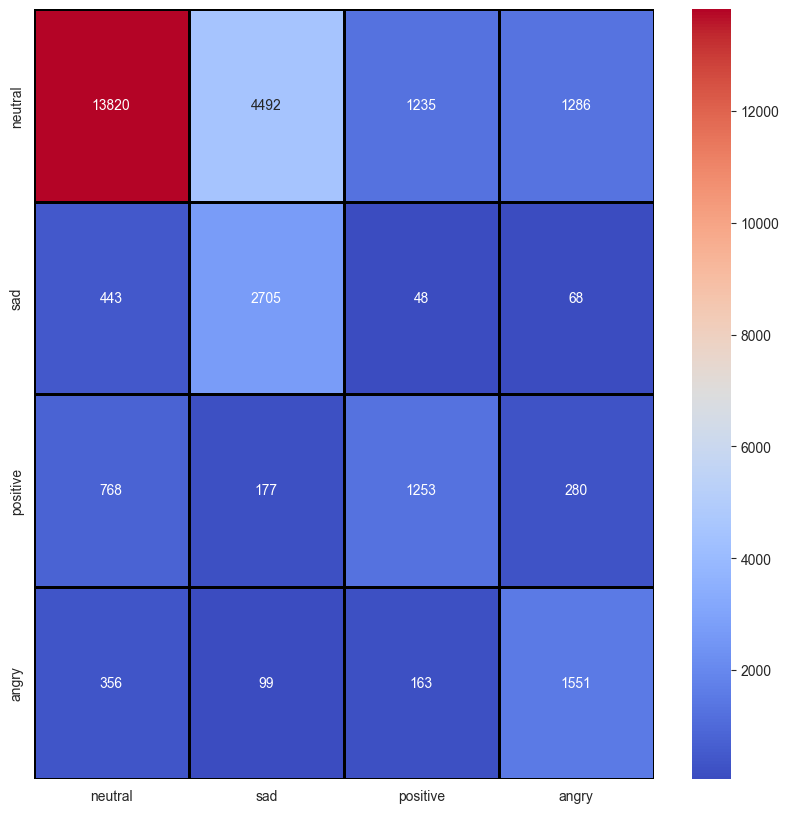

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, cmap='coolwarm', linewidths=2, linecolor='black',fmt=str(), xticklabels={'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3}, yticklabels={'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3})
plt.show()

# из инета моделька


In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from transformers import AutoConfig, Wav2Vec2Processor

import librosa
import IPython.display as ipd
import numpy as np
import pandas as pd

In [106]:
from transformers import Wav2Vec2PreTrainedModel
from transformers.models.wav2vec2.modeling_wav2vec2 import (
    Wav2Vec2PreTrainedModel,
    Wav2Vec2Model
)

class Wav2Vec2ClassificationHead(nn.Module):
    """Head for wav2vec classification task."""

    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Wav2Vec2ForSpeechClassification(Wav2Vec2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.pooling_mode = config.pooling_mode
        self.config = config

        self.wav2vec2 = Wav2Vec2Model(config)
        self.classifier = Wav2Vec2ClassificationHead(config)

        self.init_weights()

    def freeze_feature_extractor(self):
        self.wav2vec2.feature_extractor._freeze_parameters()

    def merged_strategy(
            self,
            hidden_states,
            mode="mean"
    ):
        if mode == "mean":
            outputs = torch.mean(hidden_states, dim=1)
        elif mode == "sum":
            outputs = torch.sum(hidden_states, dim=1)
        elif mode == "max":
            outputs = torch.max(hidden_states, dim=1)[0]
        else:
            raise Exception(
                "The pooling method hasn't been defined! Your pooling mode must be one of these ['mean', 'sum', 'max']")

        return outputs

    def forward(
            self,
            input_values,
            attention_mask=None,
            output_attentions=None,
            output_hidden_states=None,
            return_dict=None,
            labels=None,
    ):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        outputs = self.wav2vec2(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_states = outputs[0]
        hidden_states = self.merged_strategy(hidden_states, mode=self.pooling_mode)
        logits = self.classifier(hidden_states)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SpeechClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [107]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name_or_path = "Aniemore/wav2vec2-xlsr-53-russian-emotion-recognition"
config = AutoConfig.from_pretrained('cccnf.json')


In [108]:
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)
sampling_rate = processor.feature_extractor.sampling_rate
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path).to(device)

Some weights of the model checkpoint at Aniemore/wav2vec2-xlsr-53-russian-emotion-recognition were not used when initializing Wav2Vec2ForSpeechClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSpeechClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSpeechClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSpeechClassification were not initialized from the model checkpoint at Aniemore/wav2vec2-xlsr-53-russian-emotion-recognition and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.ori

In [129]:
def speech_file_to_array_fn(path, sampling_rate):
    speech_array, _sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(_sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech


def predict(path, sampling_rate):
    speech = speech_file_to_array_fn(path, sampling_rate)
    features = processor(speech, sampling_rate=sampling_rate, return_tensors="pt", padding=True)

    input_values = features.input_values.to(device)
    attention_mask = features.attention_mask.to(device)

    with torch.no_grad():
        logits = model(input_values, attention_mask=attention_mask).logits

    scores = F.softmax(logits, dim=1).detach().cpu().numpy()[0]
    outputs = [{"Emotion": config.id2label[i], "Score": f"{round(score * 100, 3):.1f}%"} for i, score in enumerate(scores)]
    return outputs

def prediction(df):
    predictions = []
    true_labels = []

    for index, row in df.iterrows():
        path, emotion = row["audio_path"], row["emotion"]

        speech, sr = torchaudio.load(path)
        resampler = torchaudio.transforms.Resample(sr, target_sampling_rate)
        speech = resampler(speech).squeeze().numpy()

        outputs = predict(path, sampling_rate)  # Здесь нужно реализовать вашу функцию predict
        predictions.extend(outputs)
        true_labels.extend([emotion] * len(outputs))

    report = classification_report(true_labels, predictions)
    print(report)


In [132]:
from sklearn.metrics import classification_report

def prediction(df):
    predictions = []
    true_labels = []

    for index, row in df.iterrows():
        path, emotion = row["audio_path"], row["emotion"]
        outputs = predict(path, sampling_rate)  # Вызываем функцию predict для каждой записи в датасете
        predictions.extend(outputs)
        true_labels.extend([emotion] * len(outputs))

    predicted_emotions = [output["Emotion"] for output in predictions]
    true_emotions = true_labels

    report = classification_report(true_emotions, predicted_emotions)

    print(report)



In [111]:
test = pd.read_csv("major_test_dataset.csv")
test = test.sample(1000)
test.head()

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset
2486,64d5c59cb26c26f88c3f3651cd4d2f55,64d5c59cb26c26f88c3f3651cd4d2f55.wav,3.018187,3.0,NaN,52fd8ac45fb96562bcd2d2d7d1de7328,салют помоги пройти,angry,bdedb1f6c4d09bf6ac2975059e6afb27,crowd
25167,1986efc47c48368193ed654bb802e853,1986efc47c48368193ed654bb802e853.wav,4.900000,0.0,NaN,021b6cb231ba707ccaf56f2e1e2210d0,NaN,NaN,6324c0a6aa6c838911d8a5ef589b4126,podcast
10107,fb073a1525502f5fff663486cb8ca83c,fb073a1525502f5fff663486cb8ca83c.wav,5.360000,0.0,NaN,46e8439b7337dc02401393ef87c794f8,гостевой дом диво ялта,sad,d5d65297b9534c646b9adaa1e79126b6,crowd
21300,d0f268c6f6186dd77158c715f7f4b01d,d0f268c6f6186dd77158c715f7f4b01d.wav,2.500000,0.0,NaN,ef23800f52191c3ce13cac0cee18e27a,NaN,NaN,2dd5edd5b0ea0abe060d347bc9d7b885,podcast
18293,ca923be7d90b7e43b406a36a02120f55,ca923be7d90b7e43b406a36a02120f55.wav,3.299875,0.0,NaN,c662df8cee74d52b805e576fe3aa4369,NaN,NaN,0b32e39312d28e2e9af639ec79716df0,podcast


In [112]:
dic = {0:'neutral', 1:'sadness', 2:'happiness', 3:'anger'}
test['emotion'] = test['annotator_emo'].map(dic)

In [113]:
test

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset,emotion
2486,64d5c59cb26c26f88c3f3651cd4d2f55,64d5c59cb26c26f88c3f3651cd4d2f55.wav,3.018187,3.0,NaN,52fd8ac45fb96562bcd2d2d7d1de7328,салют помоги пройти,angry,bdedb1f6c4d09bf6ac2975059e6afb27,crowd,anger
25167,1986efc47c48368193ed654bb802e853,1986efc47c48368193ed654bb802e853.wav,4.900000,0.0,NaN,021b6cb231ba707ccaf56f2e1e2210d0,NaN,NaN,6324c0a6aa6c838911d8a5ef589b4126,podcast,neutral
10107,fb073a1525502f5fff663486cb8ca83c,fb073a1525502f5fff663486cb8ca83c.wav,5.360000,0.0,NaN,46e8439b7337dc02401393ef87c794f8,гостевой дом диво ялта,sad,d5d65297b9534c646b9adaa1e79126b6,crowd,neutral
21300,d0f268c6f6186dd77158c715f7f4b01d,d0f268c6f6186dd77158c715f7f4b01d.wav,2.500000,0.0,NaN,ef23800f52191c3ce13cac0cee18e27a,NaN,NaN,2dd5edd5b0ea0abe060d347bc9d7b885,podcast,neutral
18293,ca923be7d90b7e43b406a36a02120f55,ca923be7d90b7e43b406a36a02120f55.wav,3.299875,0.0,NaN,c662df8cee74d52b805e576fe3aa4369,NaN,NaN,0b32e39312d28e2e9af639ec79716df0,podcast,neutral
...,...,...,...,...,...,...,...,...,...,...,...
3184,d7e6a4c45ff82339fd4d8ca6776b2f29,d7e6a4c45ff82339fd4d8ca6776b2f29.wav,5.181375,0.0,NaN,30a2c365226387c8cf4f22a336c3a245,да ты может даже иметь потому что нету здесь с...,angry,29c2192907ed826e72a84f34d6283881,crowd,neutral
8212,5ca97e84c0364ae282f1c4269c4068a8,5ca97e84c0364ae282f1c4269c4068a8.wav,6.220000,0.0,NaN,53bc7ed3fa387a105c939429b0b16960,марина девятова корабельники,neutral,8fc1d05120d548e572099f85afdfb275,crowd,neutral
26911,e5b89bf4db54ef01d5b4a1ebc4781870,e5b89bf4db54ef01d5b4a1ebc4781870.wav,4.200125,0.0,NaN,8151f90bf21410433ab02c42af3e77e6,NaN,NaN,a97c68139771ceecf9142db03ab36a26,podcast,neutral
11256,e12c0eaf0685a514888c2b93351e33ed,e12c0eaf0685a514888c2b93351e33ed.wav,5.380000,1.0,NaN,820476c7c12c1c2772ec5d9160b2f193,детские развивающие блоги,sad,bb758827f1b13931122c0e8593fb16b3,crowd,sadness


In [119]:
import torch.nn as nn

# Изменение числа выходов в классификаторе
class ModifiedWav2Vec2ClassificationHead(nn.Module):
    def __init__(self, input_dim=1024, output_dim=4):
        super(ModifiedWav2Vec2ClassificationHead, self).__init__()
        self.dense = nn.Linear(input_dim, input_dim).to('cuda')
        self.dropout = nn.Dropout(p=0.0).to('cuda')
        self.out_proj = nn.Linear(input_dim, output_dim).to('cuda')

    def forward(self, x):
        x = self.dense(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

# Замена классификатора в вашей модели
model.classifier = ModifiedWav2Vec2ClassificationHead(input_dim=1024, output_dim=4)


In [115]:
model

Wav2Vec2ForSpeechClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (1-4): 4 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=Tr

In [116]:
test['audio_path'] = test['audio_path'].apply(lambda x: os.path.join(r"DATASET_PATH\wavs_test", x))
test

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,dataset,emotion
2486,64d5c59cb26c26f88c3f3651cd4d2f55,DATASET_PATH\wavs_test\64d5c59cb26c26f88c3f365...,3.018187,3.0,NaN,52fd8ac45fb96562bcd2d2d7d1de7328,салют помоги пройти,angry,bdedb1f6c4d09bf6ac2975059e6afb27,crowd,anger
25167,1986efc47c48368193ed654bb802e853,DATASET_PATH\wavs_test\1986efc47c48368193ed654...,4.900000,0.0,NaN,021b6cb231ba707ccaf56f2e1e2210d0,NaN,NaN,6324c0a6aa6c838911d8a5ef589b4126,podcast,neutral
10107,fb073a1525502f5fff663486cb8ca83c,DATASET_PATH\wavs_test\fb073a1525502f5fff66348...,5.360000,0.0,NaN,46e8439b7337dc02401393ef87c794f8,гостевой дом диво ялта,sad,d5d65297b9534c646b9adaa1e79126b6,crowd,neutral
21300,d0f268c6f6186dd77158c715f7f4b01d,DATASET_PATH\wavs_test\d0f268c6f6186dd77158c71...,2.500000,0.0,NaN,ef23800f52191c3ce13cac0cee18e27a,NaN,NaN,2dd5edd5b0ea0abe060d347bc9d7b885,podcast,neutral
18293,ca923be7d90b7e43b406a36a02120f55,DATASET_PATH\wavs_test\ca923be7d90b7e43b406a36...,3.299875,0.0,NaN,c662df8cee74d52b805e576fe3aa4369,NaN,NaN,0b32e39312d28e2e9af639ec79716df0,podcast,neutral
...,...,...,...,...,...,...,...,...,...,...,...
3184,d7e6a4c45ff82339fd4d8ca6776b2f29,DATASET_PATH\wavs_test\d7e6a4c45ff82339fd4d8ca...,5.181375,0.0,NaN,30a2c365226387c8cf4f22a336c3a245,да ты может даже иметь потому что нету здесь с...,angry,29c2192907ed826e72a84f34d6283881,crowd,neutral
8212,5ca97e84c0364ae282f1c4269c4068a8,DATASET_PATH\wavs_test\5ca97e84c0364ae282f1c42...,6.220000,0.0,NaN,53bc7ed3fa387a105c939429b0b16960,марина девятова корабельники,neutral,8fc1d05120d548e572099f85afdfb275,crowd,neutral
26911,e5b89bf4db54ef01d5b4a1ebc4781870,DATASET_PATH\wavs_test\e5b89bf4db54ef01d5b4a1e...,4.200125,0.0,NaN,8151f90bf21410433ab02c42af3e77e6,NaN,NaN,a97c68139771ceecf9142db03ab36a26,podcast,neutral
11256,e12c0eaf0685a514888c2b93351e33ed,DATASET_PATH\wavs_test\e12c0eaf0685a514888c2b9...,5.380000,1.0,NaN,820476c7c12c1c2772ec5d9160b2f193,детские развивающие блоги,sad,bb758827f1b13931122c0e8593fb16b3,crowd,sadness


In [120]:
from dataclasses import dataclass
from typing import Optional, Tuple
import torch
from transformers.file_utils import ModelOutput


@dataclass
class SpeechClassifierOutput(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None


In [133]:
prediction(test)

              precision    recall  f1-score   support

       anger       0.06      0.25      0.10       256
   happiness       0.08      0.25      0.12       320
     neutral       0.73      0.25      0.37      2936
     sadness       0.12      0.25      0.16       488

    accuracy                           0.25      4000
   macro avg       0.25      0.25      0.19      4000
weighted avg       0.56      0.25      0.31      4000



In [103]:
test.annotator_emo.value_counts()

annotator_emo
0.0    720
1.0    110
2.0     91
3.0     79
Name: count, dtype: int64

In [99]:
prediction(test)


KeyError: 4

In [60]:
prediction(test.iloc[0])

,Emotion,Sentence
0,neutral,


,Emotion,Score
0,anger,0.0%
1,disgust,0.0%
2,enthusiasm,0.0%
3,fear,100.0%
4,happiness,0.0%
5,neutral,0.0%
6,sadness,0.0%


None


In [55]:
import pandas as pd
import torchaudio
import numpy as np
import librosa
from sklearn.metrics import classification_report

# Предположим, что у вас есть датасет df

for index, row in test.iterrows():
    prediction(row)  # Вызываем функцию prediction для каждой строки

    # Добавьте код для вычисления метрик и вывода classification report
    # Например:
    true_labels = row["emotion"]
    predicted_labels = predict(row["audio_path"], sampling_rate)  # Здесь нужно реализовать вашу функцию predict

    # Далее вы можете использовать функцию classification_report из sklearn для вывода отчета
    report = classification_report(true_labels, predicted_labels)
    print(report)

,Emotion,Sentence
0,neutral,


,Emotion,Score
0,anger,0.0%
1,disgust,0.0%
2,enthusiasm,0.0%
3,fear,100.0%
4,happiness,0.0%
5,neutral,0.0%
6,sadness,0.0%


InvalidParameterError: The 'y_true' parameter of classification_report must be an array-like or a sparse matrix. Got 'neutral' instead.

In [28]:
TRUST = True

config = AutoConfig.from_pretrained('Aniemore/wav2vec2-xlsr-53-russian-emotion-recognition', trust_remote_code=TRUST)
model_ = AutoModel.from_pretrained("Aniemore/wav2vec2-xlsr-53-russian-emotion-recognition", trust_remote_code=TRUST)
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("Aniemore/wav2vec2-xlsr-53-russian-emotion-recognition")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_.to(device)

config.json:   0%|          | 0.00/2.92k [00:00<?, ?B/s]

C:\Users\777\Documents\dusha\venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\777\.cache\huggingface\hub\models--Aniemore--wav2vec2-xlsr-53-russian-emotion-recognition. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


wav2vec2fsr_config.py:   0%|          | 0.00/183 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Aniemore/wav2vec2-xlsr-53-russian-emotion-recognition:
- wav2vec2fsr_config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


wav2vec2speechclassification.py:   0%|          | 0.00/4.44k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Aniemore/wav2vec2-xlsr-53-russian-emotion-recognition:
- wav2vec2speechclassification.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


ValueError: The model class you are passing has a `config_class` attribute that is not consistent with the config class you passed (model has <class 'transformers_modules.Aniemore.wav2vec2-xlsr-53-russian-emotion-recognition.aba8ec4d2292af68cf4c81dd76aa67675fad008d.wav2vec2fsr_config.W2V2FSRConfig'> and you passed <class 'transformers.models.wav2vec2.configuration_wav2vec2.Wav2Vec2Config'>. Fix one of those so they match!